In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython import display
from IPython.display import HTML

In [2]:
rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
# El código siguiente recarga (reloads) las rutinas externas cada vez que el código cambia (es útil para "debuggear" código externo)

%load_ext autoreload
%autoreload 2

# Fractales y Recursividad

## Recursividad

Las funciones recursivas son funciones que se invocan a sí mismas en su definición. Debido a que una función recursiva se invoca a sí misma para realizar su tarea, esta puede realizar acciones que contengan trabajos idénticos en múltiples objetos de datos más sencillos de conceptualizar, planear y escribir.

In [5]:
def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib(n-1) + fib(n-2)

In [6]:
fib(10)

55

<div class="alert alert-info">
**Ejercicio** Haga lo mismo para el factorial.
</div>

In [7]:
def factorial(n):
    if n == 1 or n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [8]:
factorial(5) == 120

True

## Curva de VonKoch

El [Copo de nieve de VonKoch](http://en.wikipedia.org/wiki/Koch_snowflake)

In [9]:
class CurvaVonKoch:
    def __init__(self, xi, yi, xf, yf):
        self.xi = xi
        self.yi = yi
        self.xf = xf
        self.yf = yf
    
    def _generar(self, xi, yi, xf, yf, iteracion):
        
        if iteracion == 0:
            self.dibujar(xi, yi, xf, yf)
            
        elif iteracion >= 0:
            x1 = xi + (xf - xi) / 3.0
            y1 = yi + (yf - yi) / 3.0
            
            x3 = xf - (xf - xi) / 3.0
            y3 = yf - (yf - yi) / 3.0
            
            r = hypot(x3 - x1, y3 - y1)
            alpha = np.arctan2((y3 - y1), (x3 - x1))
            alpha += np.pi/3
            
            x2 = x1 + r*np.cos(alpha)
            y2 = y1 + r*np.sin(alpha)
            
            
            self._generar(xi, yi, x1, y1, iteracion - 1)
            self._generar(x1, y1, x2, y2, iteracion - 1)
            self._generar(x2, y2, x3, y3, iteracion - 1)
            self._generar(x3, y3, xf, yf, iteracion - 1)
            
    def dibujar(self, xi, yi, xf, yf):
        plot([xi, xf], [yi, yf], lw=1.0, color='black')
        
    def generar(self, iteraciones=0):
        return self._generar(self.xi, self.yi, self.xf, self.yf, iteraciones)

In [10]:
c = CurvaVonKoch(0, 0, 9, 0)

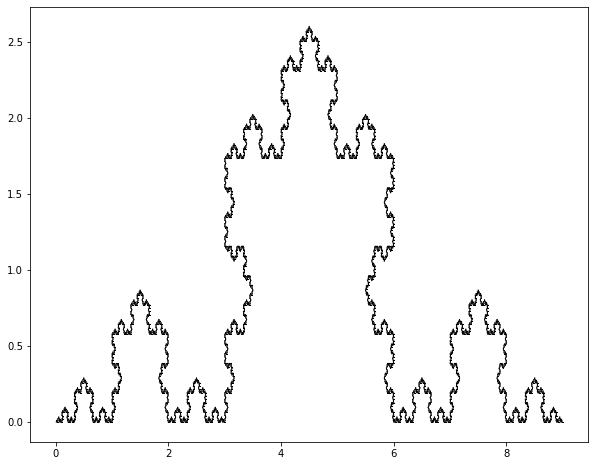

In [11]:
c.generar(iteraciones=6)

In [12]:
class CopoVonKoch:
    def __init__(self, lado=3, iteraciones=1):
        self.lado = lado
        self.iteraciones = iteraciones
        
        self.x_vertice1 = 0
        self.y_vertice1 = 0
        
        self.x_vertice2 = lado * np.cos(2 * np.pi/3.0)
        self.y_vertice2 = lado * np.sin(2 * np.pi/3.0)
        
        self.x_vertice3 = lado * np.cos(np.pi / 3.0)
        self.y_vertice3 = lado * np.sin(np.pi / 3.0)
        
        self._generar()
        
    def _generar(self):
        c1 = CurvaVonKoch(self.x_vertice1, self.y_vertice1, self.x_vertice2, self.y_vertice2)
        c2 = CurvaVonKoch(self.x_vertice2, self.y_vertice2, self.x_vertice3, self.y_vertice3)
        c3 = CurvaVonKoch(self.x_vertice3, self.y_vertice3, self.x_vertice1, self.y_vertice1)
        
        c1.generar(self.iteraciones)
        c2.generar(self.iteraciones)
        c3.generar(self.iteraciones)
        

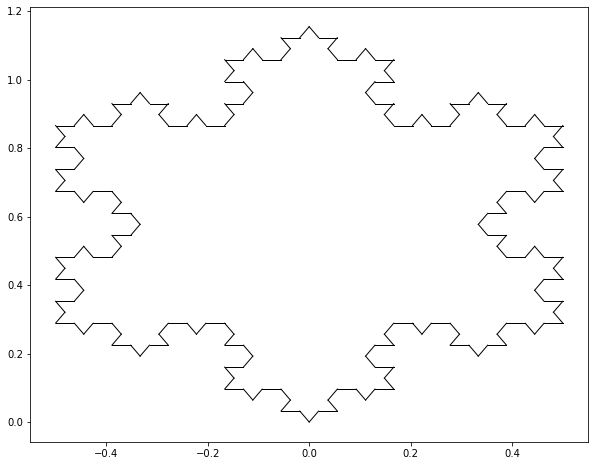

In [13]:
copo = CopoVonKoch(lado=1,iteraciones=3)

<div class="alert alert-info">
    
**Ejercicio** Genera de la misma manera el [Triángulo de Sierpinski](http://en.wikipedia.org/wiki/Sierpinski_triangle)
</div>

In [4]:
class Triangulo_Sierpinski:
    def __init__(self, lado = 1, iteraciones = 1):
        self.lado = lado
        self.iteraciones = iteraciones
        
        self.x_vertice1 = 0
        self.y_vertice1 = 0
        
        self.x_vertice2 = lado
        self.y_vertice2 = 0
        
        self.x_vertice3 = lado * np.cos(np.pi / 3.0)
        self.y_vertice3 = lado * np.sin(np.pi / 3.0)
        
        self._generar(self.iteraciones, self.x_vertice1, self.y_vertice1,
                      self.x_vertice2, self.y_vertice2,
                      self.x_vertice3, self.y_vertice3
                     )
        
    def mid_point(x1, y1, x2, y2):
        return (x1+x2)/2.0, (y1+y2)/2.0
    
    def _generar(self, iteracion, x1, y1, x2, y2, x3, y3):
        if iteracion > 0:
            self.dibujar(x1, y1, x2, y2, x3, y3)
            
            self._generar(iteracion-1, x1,y1, (x1+x2)/2.0, (y1+y2)/2.0, (x1+x3)/2.0,(y1+y3)/2.0)
            self._generar(iteracion-1, (x1+x2)/2.0, (y1+y2)/2.0, x2,y2, (x2+x3)/2.0,(y2+y3)/2.0)
            self._generar(iteracion-1, (x1+x3)/2.0, (y1+y3)/2.0, (x3+x2)/2.0, (y3+y2)/2.0, x3, y3)
        

        
    def dibujar(self, x1, y1, x2, y2, x3, y3):
        plot([x1, x2], [y1, y2], lw=1.0, color='black')
        plot([x2, x3], [y2, y3], lw=1.0, color='black')
        plot([x3, x1], [y3, y1], lw=1.0, color='black')
        

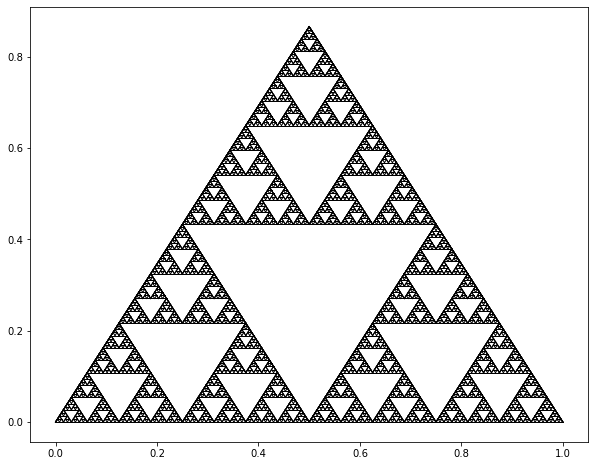

In [15]:
Triangulo_Sierpinski(iteraciones = 8)

## El juego del Caos

### Algoritmo

1. Escoge 3 puntos en el plano (formando un triángulo)
2. Escoge unos de los vértices como el punto inicial.
3. Escoge al azar otro vértice del triángulo.
4. Muévete en esa dirección la mitad de la distancia.
5. Marca el punto.
6. Repite desde el paso 3.

In [10]:
from IPython.display import HTML
import matplotlib.animation as animation

In [11]:
class ChaosGame(object):
    def __init__(self, esquinas=[[0.0, 0.0], [4.0, 8.0], [8.0, 0.0]], steps=10):
        self.esquinas = np.array(esquinas)
        
        self.steps = steps
        self.fig, self.ax = plt.subplots()

        self.ani = animation.FuncAnimation(self.fig, self.update, 
                                           interval=100, frames=self.steps, init_func=self.setup_plot)
                
        self.punto_actual = random.choice(self.esquinas) # Elegimos un vértice de inicio
        
        self.puntos = self.punto_actual

    def setup_plot(self):
        self.ax.axis([0,10,0,10])
        self.ax.set_yticklabels([])
        self.ax.set_xticklabels([])
        self.ax.set_yticks([])
        self.ax.set_xticks([])
        self.scatter = self.ax.scatter(self.esquinas[:,:1],self.esquinas[:,1:])
     
        
        return self.scatter,
        
    def show(self):
        plt.show()
        
    def next_point(self):
        target_point = random.choice(self.esquinas)
        return (target_point + self.punto_actual)/2
           
    def update(self, i):
        self.punto_actual = self.next_point()
        self.puntos = np.vstack((self.puntos, self.punto_actual))
        self.scatter.set_offsets(self.puntos)
        return self.scatter,

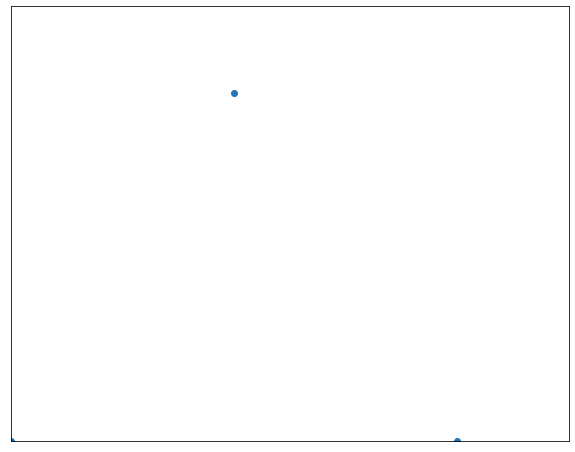

In [12]:
a = ChaosGame(steps=1000)

In [13]:
HTML(a.ani.to_html5_video())